In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Construct the domain
n = 40 # n points along x
m = 30 # m points along y

h = 0.02

a = 0.3
b = a+(n-1)*h
c = 0.5
d = c+(m-1)*h

phi = linspace(a,b,n)
psi = linspace(c,d,m)

In [3]:
XX, YY = meshgrid(phi, psi)
XX.shape, YY.shape

((30, 40), (30, 40))

In [4]:
# Lets store the XX and YY coordinates in the same X vector, as in the lectures notes
# Shape of X = (m, n, 2) = XX.shape + (2,)
X = zeros(XX.shape+(2,))
X[:,:,0] = XX
X[:,:,1] = YY

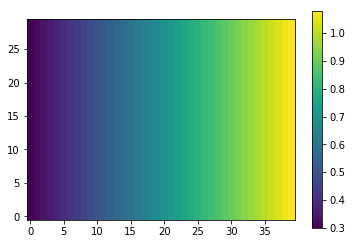

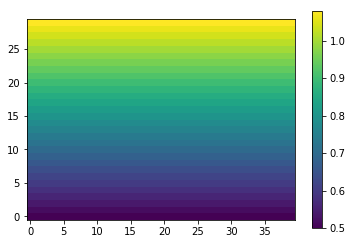

In [5]:
imshow(XX, origin='lower')
colorbar()
figure()
imshow(YY, origin='lower')
colorbar()

In [6]:
# Define an exact solution (with the correct boundary conditions!), 
# and then compute its laplacian to get a test rhs
def exact(x,y):
    return sin((x-a)*pi/(b-a))*sin((y-c)*pi/(d-c))

def myfun(x,y):
    return sin((x-a)*pi/(b-a))*sin((y-c)*pi/(d-c))*pi**2*(1/(b-a)**2 + 1/(d-c)**2)

# same as myfun(XX,YY)
f = myfun(X[:,:,0], X[:,:,1])
u_exact = exact(X[:,:,0], X[:,:,1])

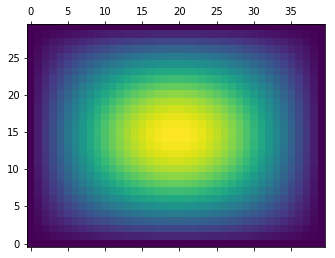

In [7]:
matshow(u_exact, origin='lower')

In [8]:
# Assemble the finite difference matrix in 2D.
A = zeros((m,n, m,n))

for alpha in range(1,m-1):
    for i in range(1,n-1):
        A[alpha,i, alpha, i] = 4/h**2
        A[alpha,i, alpha-1, i] = -1/h**2
        A[alpha,i, alpha+1, i] = -1/h**2
        A[alpha,i, alpha, i-1] = -1/h**2
        A[alpha,i, alpha, i+1] = -1/h**2

# Boundary conditions!
A[0,:,0,:] = eye((n))
A[-1,:,-1,:] = eye((n))
A[:,0,:,0] = eye((m))
A[:,-1,:,-1] = eye((m))

# Same is true for rhs:
f[0,:] = 0
f[-1,:] = 0
f[:,0] = 0
f[:,-1] = 0

# Reshape both A and f
Atilde = A.reshape((m*n, m*n))
ftilde = f.reshape((m*n,))

In [9]:
# Unwrapped version of the solution
Utilde = linalg.solve(Atilde,ftilde)
u = Utilde.reshape((m,n))

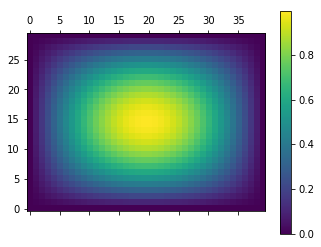

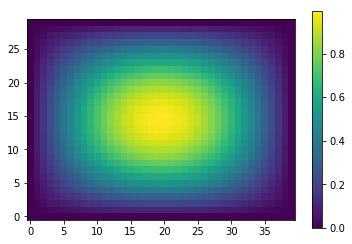

In [10]:
matshow(u, origin='lower')
colorbar()
figure()
imshow(u_exact, origin='lower')
colorbar()

In [11]:
error = np.max(abs(u-u_exact))
print("Linfty error: ", error)

Linfty error:  0.000820803944908
